# <u><font style="color: purple"> DETECTION OF POLYSYCTIC OVARIAN SYNDROME (PCOS) </u> 

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Importing Dataset

In [2]:
dataset=pd.read_csv('PCOS.csv')

# Data Preprocessing

In [3]:
dataset.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [4]:
dataset.drop(["Sl. No","Patient File No."],axis=1,inplace=True)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of aborptions       541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

<b>From the above information, we observe that </b> :
1. 'AMH(ng/mL)' and 'II beta-HCG(mIU/mL)' have <b>data type as object</b>
2. 'Marraige Status (Yrs)' and 'Fast food (Y/N)' have <b>null entries</b>

In [6]:
#Converting data type 'object' into 'float' type
dataset["AMH(ng/mL)"] = pd.to_numeric(dataset["AMH(ng/mL)"], errors="coerce") 

dataset["II    beta-HCG(mIU/mL)"] = pd.to_numeric(dataset["II    beta-HCG(mIU/mL)"], errors="coerce")

In [7]:
#Looking for columns with null entries
lst_missing_columns = dataset.columns[dataset.isna().any()].tolist()
lst_missing_columns

['Marraige Status (Yrs)',
 'II    beta-HCG(mIU/mL)',
 'AMH(ng/mL)',
 'Fast food (Y/N)']

In [8]:
# replacing null entries with median of that corresponding column
for x in lst_missing_columns:
    dataset[x] = dataset[x].fillna(dataset[x].median())  

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   541 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of aborptions       541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

### Checking for outliers

We categorise the features of the dataset into categorical and numerical variables

In [10]:
category = ["Target", "Pregnant(Y/N)", "Weight gain(Y/N)", "hair growth(Y/N)", "Skin darkening (Y/N)", "Hair loss(Y/N)", 
            "Pimples(Y/N)", "Fast food (Y/N)", "Reg.Exercise(Y/N)", "Blood Group","Cycle(R/I)"]

numericVar = [" Age (yrs)", "Weight (Kg)","Marraige Status (Yrs)","Height(Cm) ","BMI","Pulse rate(bpm) ",
              "RR (breaths/min)","Hb(g/dl)","Cycle length(days)","FSH(mIU/mL)","II    beta-HCG(mIU/mL)",
              "  I   beta-HCG(mIU/mL)","LH(mIU/mL)","FSH/LH","Hip(inch)","Waist(inch)","Hip(inch)","Waist:Hip Ratio",
              "TSH (mIU/L)","AMH(ng/mL)","PRL(ng/mL)","Vit D3 (ng/mL)","PRG(ng/mL)","RBS(mg/dl)","BP _Systolic (mmHg)",
              "BP _Diastolic (mmHg)","Follicle No. (L)","Follicle No. (R)","Avg. F size (L) (mm)","Avg. F size (R) (mm)",
              "Endometrium (mm)"] 

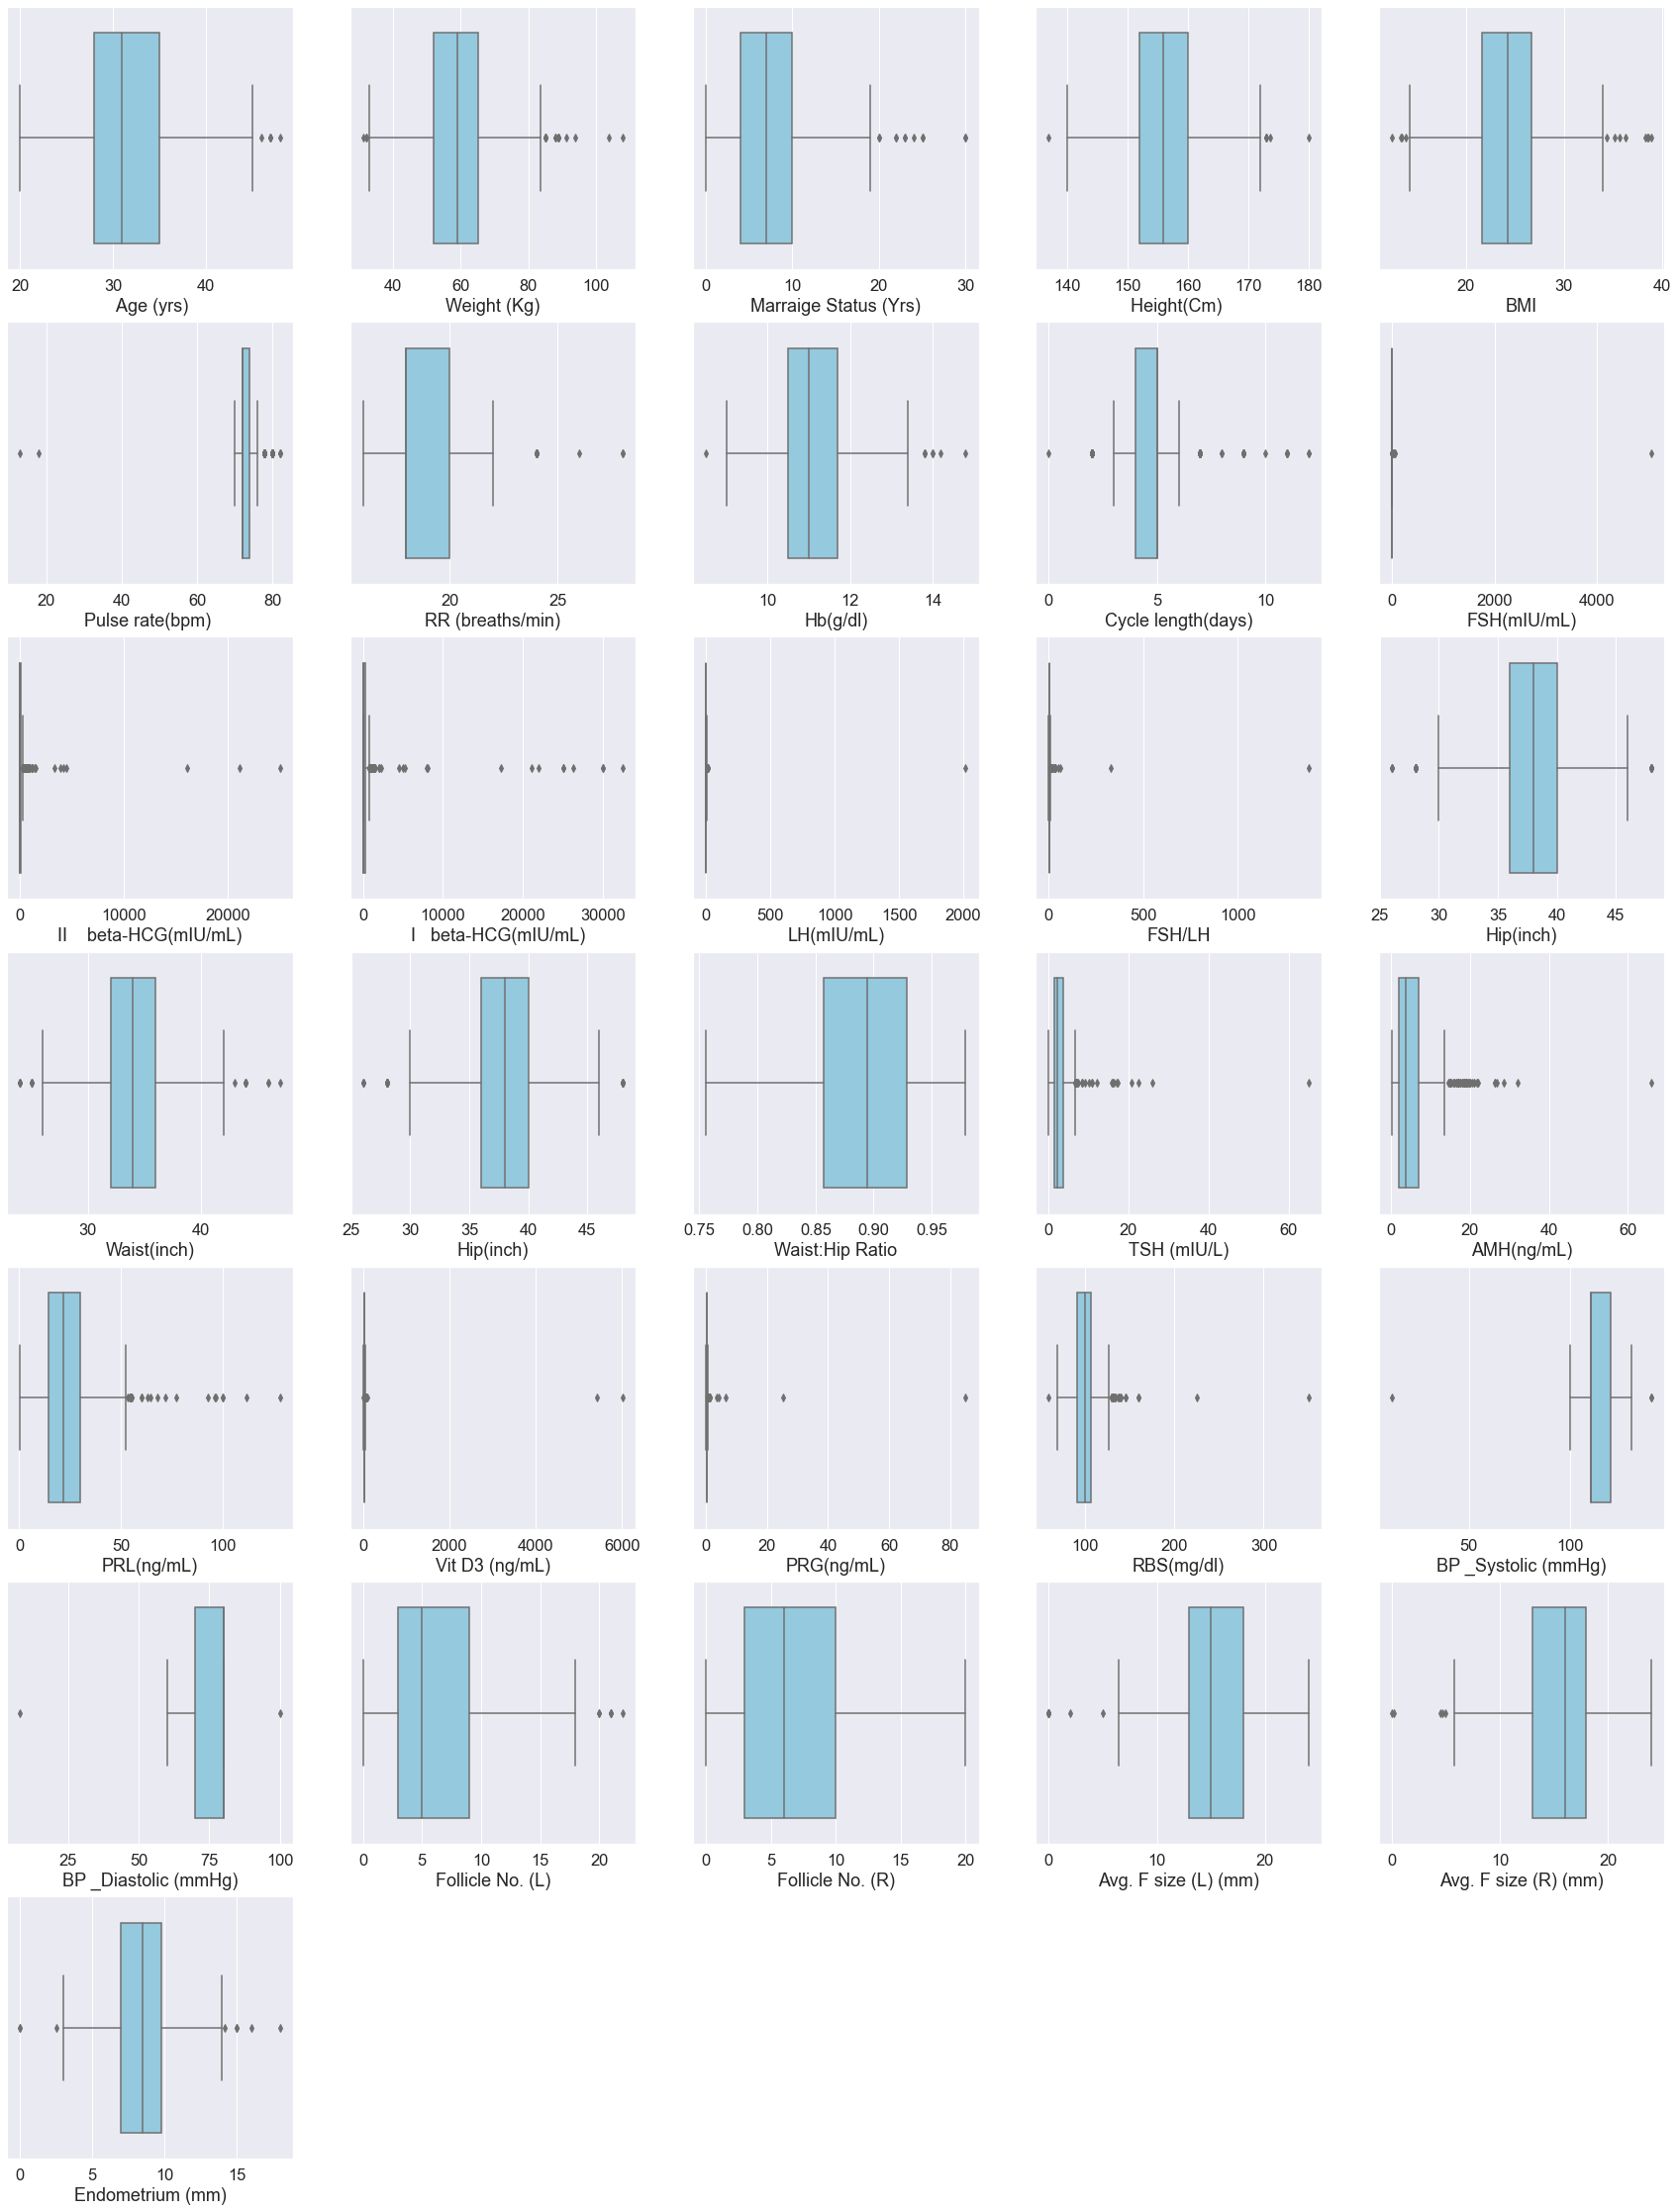

In [11]:
#checking for outliers using box plot method
plt.figure(figsize = (30,40))
a,b,c = 7,5,1
sns.set(font_scale = 1.5)
for i in numericVar:
    plt.subplot(a, b, c)
    sns.boxplot(x=dataset[i], color = 'skyblue')
    c=c+1

In [12]:
#detecting outliers in each column using IQR method
# from scipy import stats
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25, interpolation = 'midpoint')
    q3 = np.percentile(data, 75, interpolation = 'midpoint')
    # print(q1, q3)
    IQR = (q3-q1)
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

for i in numericVar:
    sample_outliers = detect_outliers_iqr(dataset[i])
    print(f'Outliers from IQR method in {i}: {pd.Series(sample_outliers,dtype=float).unique()}')
    median = np.median(dataset[i]) # Replace with median
    for j in sample_outliers:
         dataset[i] = np.where(dataset[i]==j, median,dataset[i] )

  

Outliers from IQR method in  Age (yrs): [46. 47. 48.]
Outliers from IQR method in Weight (Kg): [ 31.   32.   85.   87.9  88.   89.   91.4  94.  104.  108. ]
Outliers from IQR method in Marraige Status (Yrs): [20. 22. 23. 24. 25. 30.]
Outliers from IQR method in Height(Cm) : [137.  173.  173.7 180. ]
Outliers from IQR method in BMI: [12.41788175 13.38796706 13.49300051 13.85041551 34.3        35.2
 35.69716021 36.31082062 38.26530612 38.47952593 38.5393827  38.9       ]
Outliers from IQR method in Pulse rate(bpm) : [13. 18. 78. 80. 82.]
Outliers from IQR method in RR (breaths/min): [24. 26. 28.]
Outliers from IQR method in Hb(g/dl): [ 8.5 13.8 14.  14.2 14.8]
Outliers from IQR method in Cycle length(days): [ 0.  2.  7.  8.  9. 10. 11. 12.]
Outliers from IQR method in FSH(mIU/mL): [  11.12   11.62   11.96   12.28   13.9    14.99   15.45   22.     40.08
   60.37   65.4  5052.  ]
Outliers from IQR method in II    beta-HCG(mIU/mL): [  252.72   255.02   268.37   272.78   273.7    277.28   27

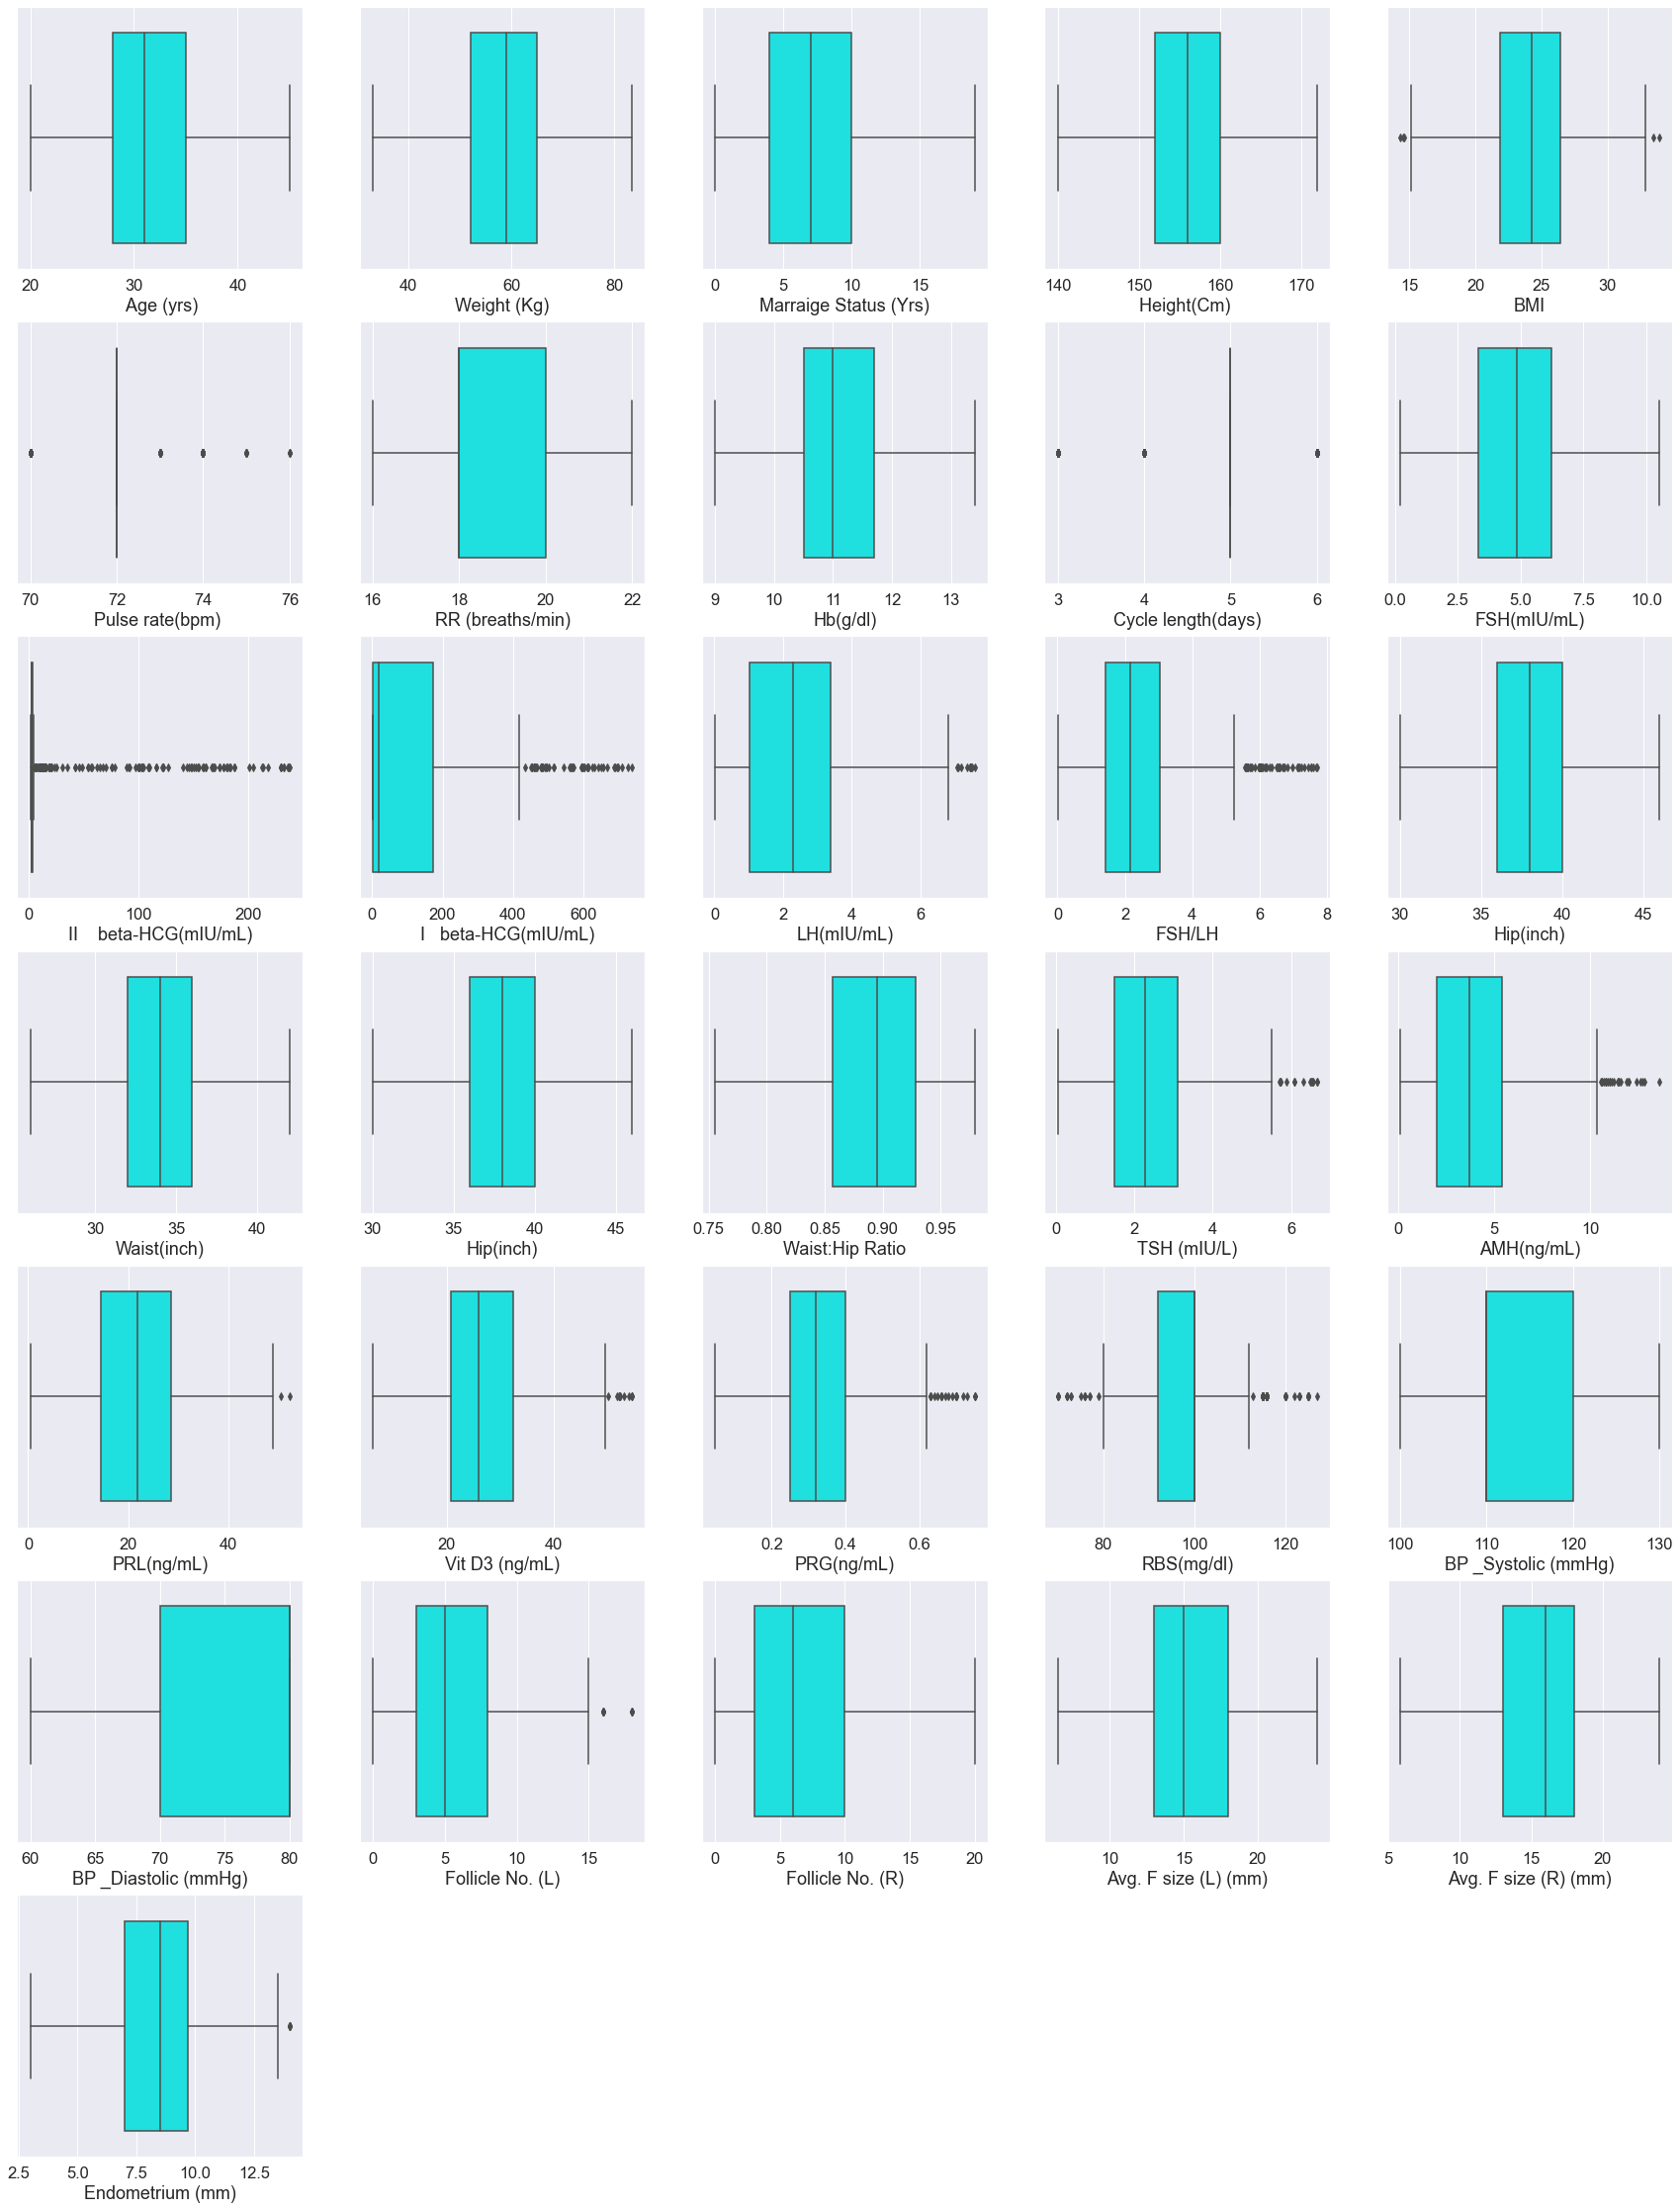

In [13]:
plt.figure(figsize = (30,40))
a,b,c = 7,5,1
sns.set(font_scale = 1.5)
for i in numericVar:
    plt.subplot(a, b, c)
    sns.boxplot(dataset[i], color = 'cyan')
    c=c+1

### Checking for Skewness

In [23]:
skewness={}
for i in numericVar:
    skewness[i] = dataset[i].skew()
skew=pd.DataFrame(skewness,skewness.keys()) #skewness.keys() is used as index labels
skew.iloc[0,:]

 Age (yrs)                0.234121
Weight (Kg)               0.088206
Marraige Status (Yrs)     0.619632
Height(Cm)                0.213745
BMI                       0.011820
Pulse rate(bpm)           0.358941
RR (breaths/min)          0.584276
Hb(g/dl)                  0.515507
Cycle length(days)       -0.882769
FSH(mIU/mL)               0.333417
II    beta-HCG(mIU/mL)    2.706572
  I   beta-HCG(mIU/mL)    1.620303
LH(mIU/mL)                0.824775
FSH/LH                    1.304941
Hip(inch)                -0.012093
Waist(inch)               0.008960
Waist:Hip Ratio          -0.350015
TSH (mIU/L)               0.862837
AMH(ng/mL)                1.065734
PRL(ng/mL)                0.495391
Vit D3 (ng/mL)            0.590550
PRG(ng/mL)                1.225355
RBS(mg/dl)                0.305243
BP _Systolic (mmHg)      -0.043570
BP _Diastolic (mmHg)     -0.944437
Follicle No. (L)          0.722620
Follicle No. (R)          0.785224
Avg. F size (L) (mm)     -0.306819
Avg. F size (R) (mm)

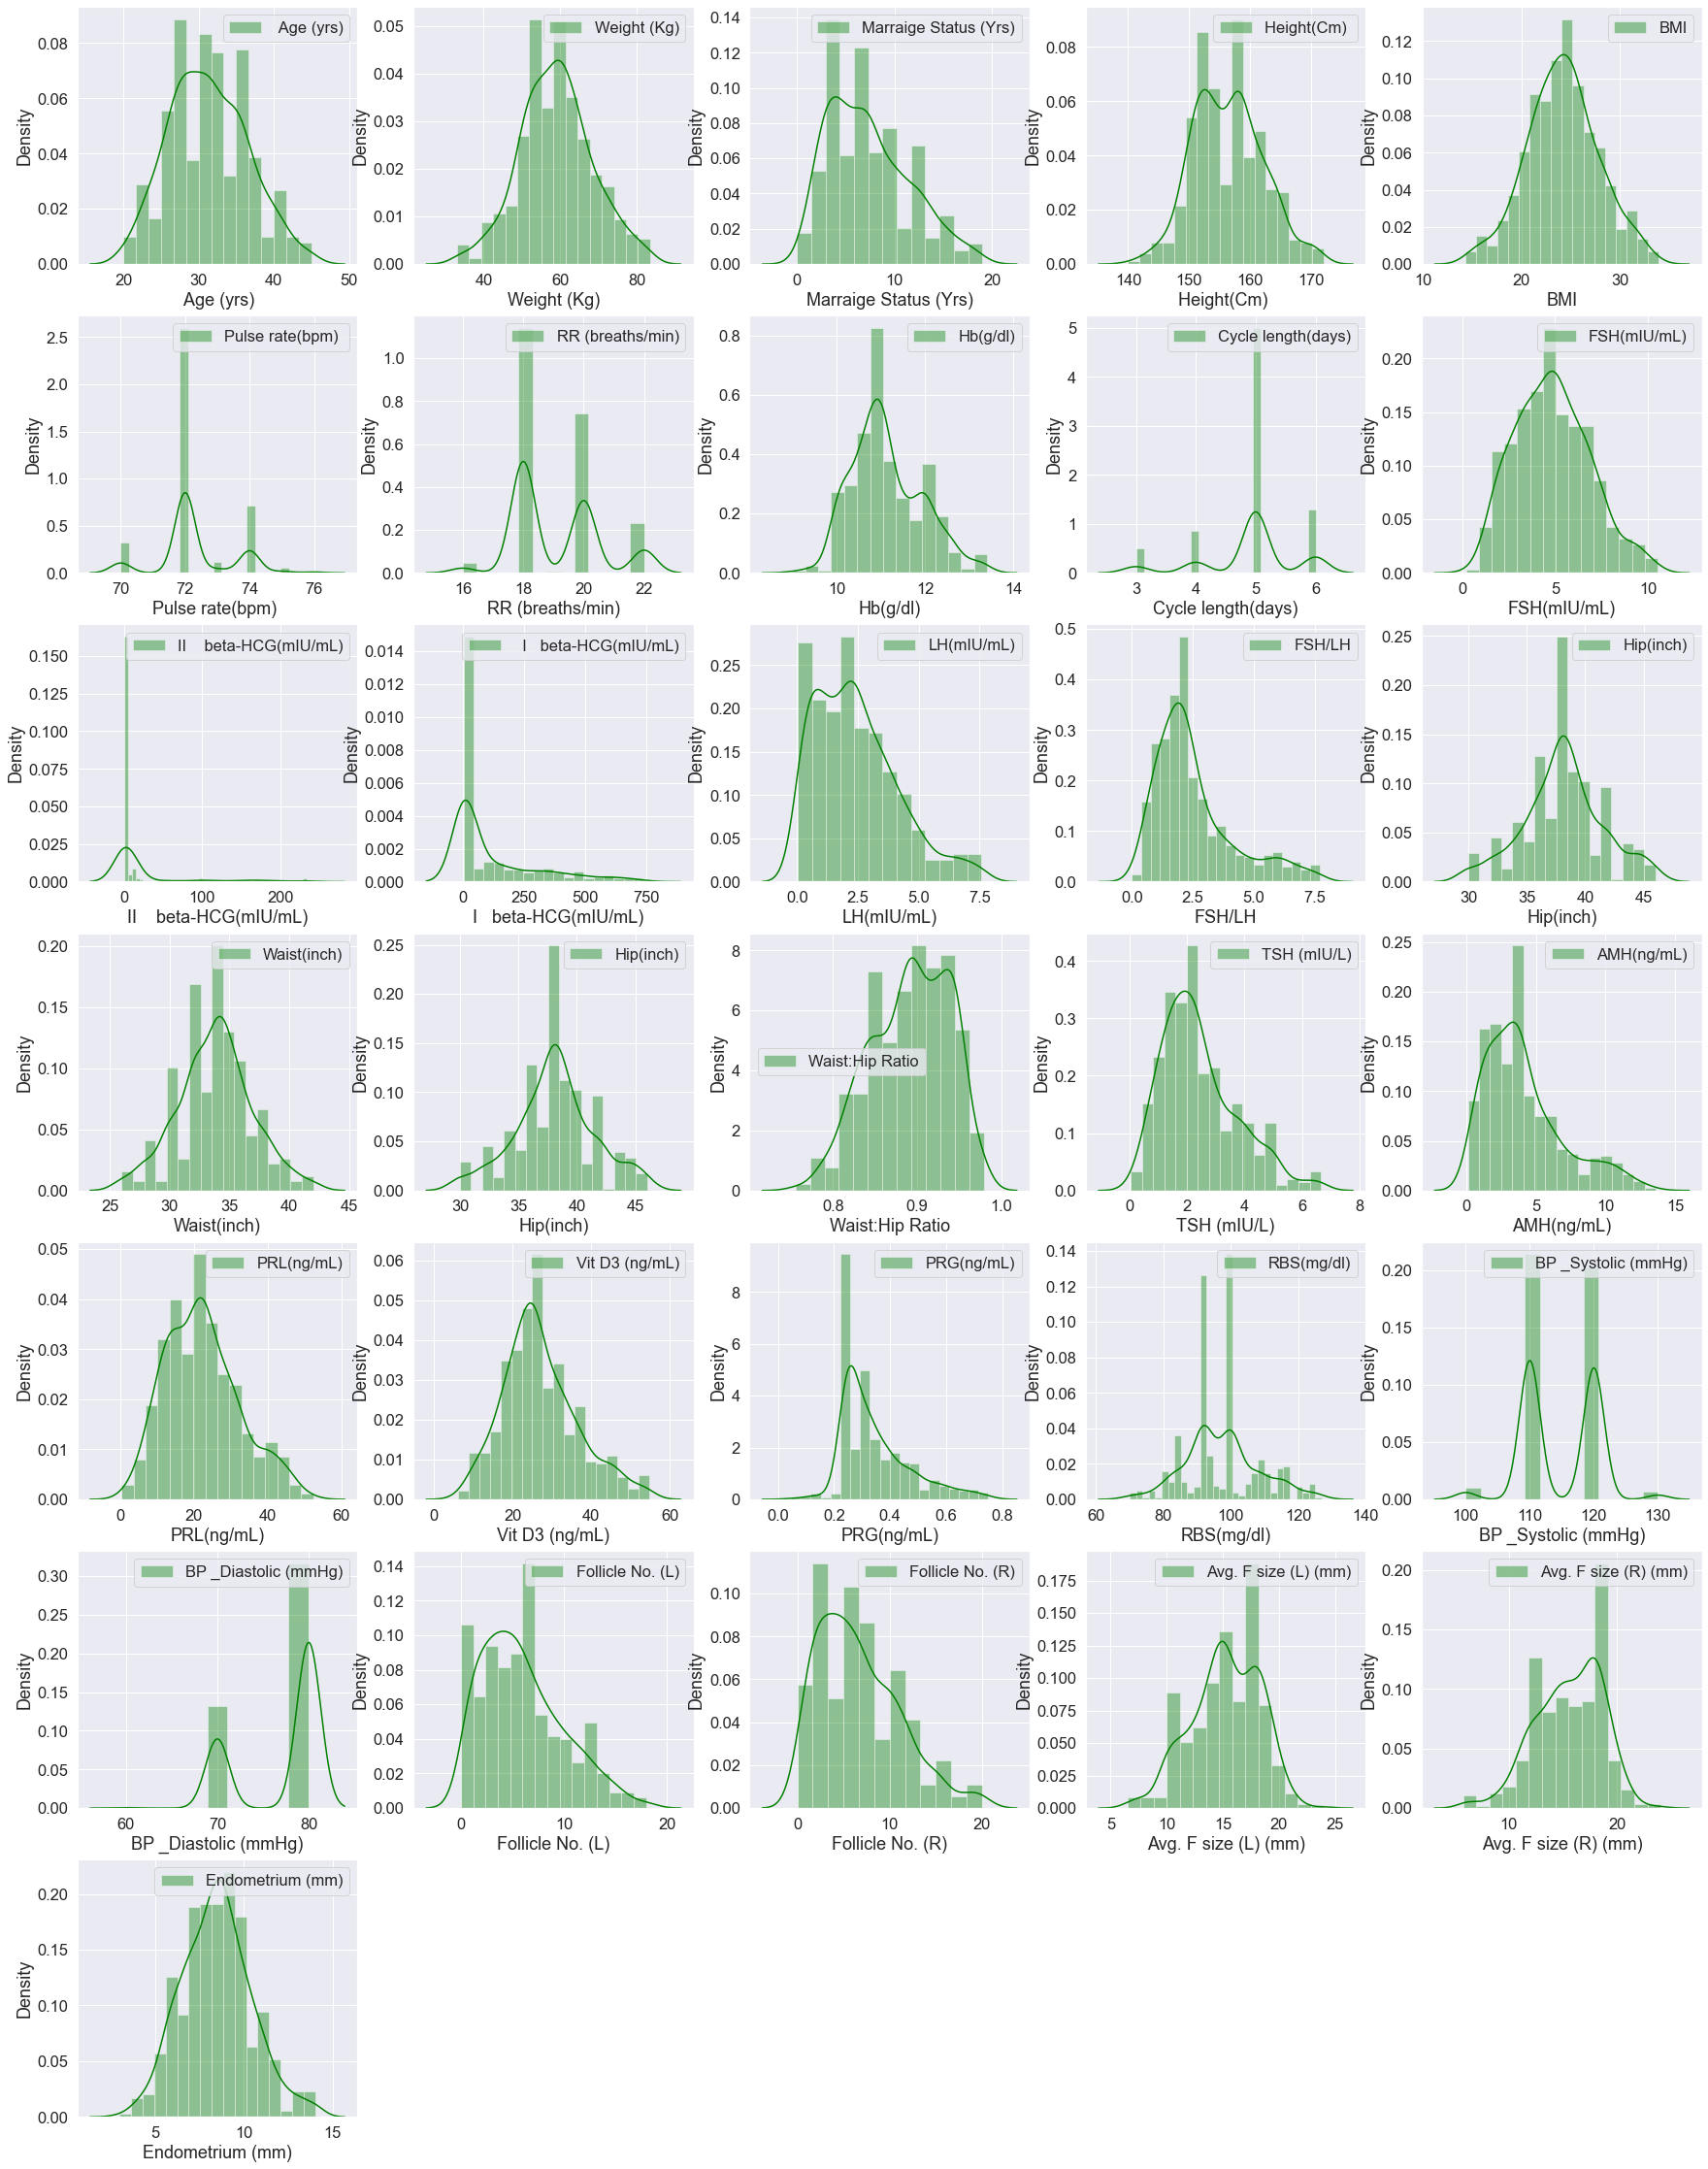

In [21]:
plt.figure(figsize = (30,40))
a,b,c = 7,5,1
sns.set(font_scale = 1.5)
for i in numericVar:
    plt.subplot(a, b, c)
    sns.distplot(dataset[i], color = 'green',label = i)
    plt.legend()
    c=c+1
plt.show()
# list(dataset.columns)

From the above graphs we observe that the data is not highly skewed

## Checking for correlation among various attributes


In [100]:
corr1=dataset.corr()
corr1

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
PCOS (Y/N),1.000000,-0.191248,0.158093,0.036982,0.173856,0.036433,0.097513,0.012635,0.096323,0.401644,...,0.286077,0.376183,0.065337,0.001681,0.031388,0.584823,0.648327,0.114681,0.098024,0.112763
Age (yrs),-0.191248,1.000000,-0.077875,-0.120079,-0.015763,-0.017951,0.024520,0.094797,-0.034487,-0.110493,...,-0.041264,-0.044808,-0.037850,0.113067,0.059070,-0.157844,-0.194598,-0.000020,-0.087661,-0.135818
Weight (Kg),0.158093,-0.077875,1.000000,0.396467,0.852822,0.062324,0.046723,-0.012172,0.042386,0.176869,...,0.040336,0.132853,-0.037457,0.043270,0.115723,0.114941,0.106608,-0.072262,-0.070546,0.005545
Height(Cm),0.036982,-0.120079,0.396467,1.000000,-0.021591,0.050988,-0.004671,-0.042555,0.012866,-0.014265,...,0.027910,0.026279,-0.003397,-0.037676,0.003607,0.086122,0.087391,-0.055978,0.045523,-0.005645
BMI,0.173856,-0.015763,0.852822,-0.021591,1.000000,0.043858,0.046827,0.004087,0.051870,0.221435,...,0.028140,0.151863,-0.060501,0.066331,0.132525,0.098952,0.076158,-0.046390,-0.099712,0.014164
Blood Group,0.036433,-0.017951,0.062324,0.050988,0.043858,1.000000,-0.007338,-0.028570,0.011108,0.123724,...,0.039029,-0.035836,0.064035,0.034510,0.078791,0.048622,0.013974,-0.024204,-0.015736,-0.011165
Pulse rate(bpm),0.097513,0.024520,0.046723,-0.004671,0.046827,-0.007338,1.000000,0.152375,0.060622,0.152240,...,0.121262,0.136850,-0.000446,0.070653,-0.106035,0.128558,0.119101,-0.060209,-0.046771,-0.042150
RR (breaths/min),0.012635,0.094797,-0.012172,-0.042555,0.004087,-0.028570,0.152375,1.000000,-0.027118,0.011115,...,-0.001593,0.086749,-0.016272,0.106729,0.051520,0.018750,-0.012114,0.008427,0.012493,-0.068129
Hb(g/dl),0.096323,-0.034487,0.042386,0.012866,0.051870,0.011108,0.060622,-0.027118,1.000000,0.052037,...,0.061952,0.055466,0.022924,0.053372,0.005781,0.058500,0.068747,0.029755,0.006549,-0.100079
Cycle(R/I),0.401644,-0.110493,0.176869,-0.014265,0.221435,0.123724,0.152240,0.011115,0.052037,1.000000,...,0.121380,0.208263,-0.004989,0.063217,0.085265,0.278820,0.251575,0.011090,0.013848,0.072176


In [132]:
# Printing the list of highly correlated variables(Abs(corr)>0.7)

for i in range(1,42):
    for j in range(1,i):
        if abs(corr1.iloc[i,j])>0.7:
            c = corr1.iloc[i,j]
            print(f'The correlation between {dataset.columns[i]} and {dataset.columns[j]} :  {c}')

The correlation between BMI and Weight (Kg) :  0.8528223523776867
The correlation between Waist(inch) and Hip(inch) :  0.7779617390048866
The correlation between Follicle No. (R) and Follicle No. (L) :  0.740128597339136


In [130]:
# Printing the list of highly correlated variable with PCOS label

i=0
for j in range(1,dataset.shape[1]):
    if abs(corr1.iloc[i,j])>0.5:
        c = corr1.iloc[i,j]
        print(f'The correlation between {dataset.columns[i]} and {dataset.columns[j]} :  {c}')

The correlation between PCOS (Y/N) and Follicle No. (L) :  0.5848226793532336
The correlation between PCOS (Y/N) and Follicle No. (R) :  0.6483269560999776


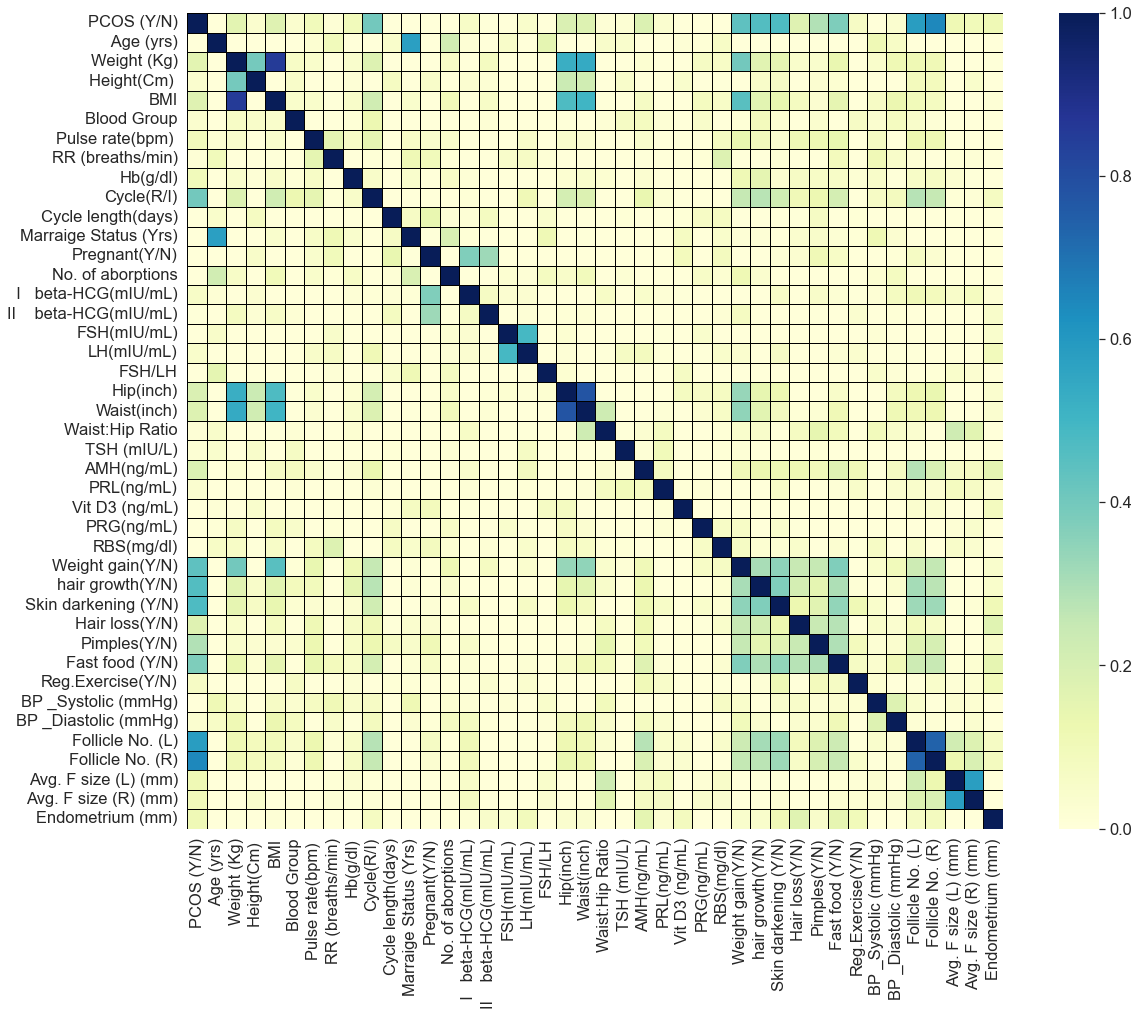

In [102]:
# Heatmap for correlation

plt.figure(figsize = (20,15))
sns.heatmap(dataset.corr(), cmap = "YlGnBu",vmin = 0,vmax = 1,linewidth = 1,linecolor = 'black',square = True)
plt.show()

## Splitting the dataset

In [103]:
X=dataset.iloc[:,1:].values
y=dataset.iloc[:,0].values

In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


## Feature Scaling

In [105]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Selection and Training

In [106]:
# Selecting the best modelfor training our dataset using K-Cross Validation

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


classifier_lr = LogisticRegression(random_state = 0)
classifier_rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_svm = SVC(kernel = 'rbf', random_state = 0)
classifier_nb = GaussianNB()

classifiers={classifier_lr:'Logistic Regression',classifier_rfc:'Random Forest',classifier_svm:'Support Vector Machine',classifier_nb:'Naive Bayes'}

In [108]:
from sklearn.model_selection import cross_val_score
j=0
for i in classifiers:
    accuracies = cross_val_score(estimator=i, X = X_train, y = y_train, cv = 10)
    print(list(classifiers.values())[j])
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100),'\n')
    j+=1

Logistic Regression
Accuracy: 88.44 %
Standard Deviation: 4.12 % 

Random Forest
Accuracy: 87.27 %
Standard Deviation: 6.22 % 

Support Vector Machine
Accuracy: 88.67 %
Standard Deviation: 4.40 % 

Naive Bayes
Accuracy: 89.83 %
Standard Deviation: 4.28 % 



<b> We observe that Naive Bayes algorithm is the best algorithm for training our dataset </b>

In [109]:
# Training the model using Naive Bayes algorithm  
classifier_nb.fit(X_train, y_train)

GaussianNB()

### Confusion Matrix and calculating Accuracy score

In [110]:
y_pred=classifier_nb.predict(X_test)


from sklearn.metrics import confusion_matrix, accuracy_score


cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[62  8]
 [ 4 35]]


0.8899082568807339